# Word Level - Language Modeling in TensorFlow

In [1]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

Using Theano backend.
Using cuDNN version 6021 on context None
Mapped name None to device cuda: GeForce GTX 1050 (0000:01:00.0)


In [2]:
import pandas as pd
import numpy as np
import os
import string
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_pandas = pd.read_csv("./data/language_model/coco.valannotations.txt", delimiter = "\t", header=None)
data_pandas.columns = ['Data_{}'.format(int(i)+i) for i in data_pandas.columns]
data_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25015 entries, 0 to 25014
Data columns (total 1 columns):
Data_0    25015 non-null object
dtypes: object(1)
memory usage: 195.5+ KB


In [4]:
data_list = []
data_list.extend(data_pandas.Data_0.values)
data_list[:5]

['A man is in a kitchen making pizzas.',
 'Man in apron standing on front of oven with pans and bakeware',
 'A baker is working in the kitchen rolling dough.',
 'A person standing by a stove in a kitchen.',
 'A table with pies being made and a person standing near a wall with pots and pans hanging on the wall.']

## Preprocessing dataset

In [5]:
unk_token = "UNK_TOKEN"
sentence_start_token = "SENT_START"
sentence_end_token = "SENT_END"

In [6]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt

def count_histogram(corpus):
    num_words = []
    for line in corpus:
        num_words.append(len(line.split()))
    return num_words    
        
data_clean = [clean_text(x) for x in data_list]
num_words = count_histogram(data_clean)

data_clean[:5]

['a man is in a kitchen making pizzas',
 'man in apron standing on front of oven with pans and bakeware',
 'a baker is working in the kitchen rolling dough',
 'a person standing by a stove in a kitchen',
 'a table with pies being made and a person standing near a wall with pots and pans hanging on the wall']

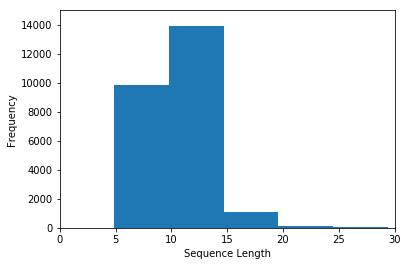

In [7]:
plt.hist(num_words)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 30, 0, 15000])
plt.show()

In [8]:
num_length = 19

In [9]:
def gen_corpus(corpus, num_length):
    data = []
    for line in corpus:
        if len(line.split()) <= num_length:
            data.append(line)
    return data

data_clean = gen_corpus(data_clean, num_length)
data_clean[:5]

['a man is in a kitchen making pizzas',
 'man in apron standing on front of oven with pans and bakeware',
 'a baker is working in the kitchen rolling dough',
 'a person standing by a stove in a kitchen',
 'the dining table near the kitchen has a bowl of fruit on it']

In [10]:
max_features = 10000

In [11]:
tk = Tokenizer(oov_token='<UNK>', num_words=max_features+1)
tk.fit_on_texts(data_clean)

tk.word_index = {e:i-1 for e,i in tk.word_index.items() if i <= max_features + 1 }
max_features = len(tk.word_index) - 1

tk.word_index['<UNK>'] = max_features + 1
data_token = tk.texts_to_sequences(data_clean)
data_token[:5]

[[1, 10, 8, 5, 1, 65, 440, 574],
 [10, 5, 1864, 14, 2, 37, 3, 267, 6, 1039, 7, 4237],
 [1, 3210, 8, 525, 5, 4, 65, 1865, 3211],
 [1, 28, 14, 47, 1, 301, 5, 1, 65],
 [4, 448, 22, 35, 4, 65, 48, 1, 142, 3, 227, 2, 27]]

In [12]:
word_to_id = {e:i for e,i in tk.word_index.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = max_features + 2
word_to_id["<END>"] = max_features + 3

id_to_word = {i:e for e,i in word_to_id.items()}
print("Vocabulary size: %d"%len(word_to_id))

Vocabulary size: 7241


In [13]:
word_to_id

{'butterflies': 3750,
 'janitors': 4243,
 'specialized': 3928,
 'ottoman': 4117,
 'mom': 3138,
 'jams': 5582,
 'briefcase': 1731,
 'bear': 97,
 'launched': 6488,
 'flies': 584,
 'pan': 509,
 'twigs': 5171,
 'relaxed': 4560,
 'assuming': 5703,
 'feed': 1371,
 'propped': 1523,
 'ding': 6641,
 'poverty': 6522,
 'cubbyholes': 5497,
 'silhouettes': 3446,
 'skater': 2183,
 'distorted': 6379,
 'shared': 6220,
 'dock': 775,
 'library': 1492,
 'horse': 98,
 'walkie': 6908,
 'repairing': 6062,
 'fashionable': 4207,
 'ad': 2667,
 'studios': 5116,
 'celebrating': 2170,
 'staning': 3401,
 'cross': 456,
 'landfill': 6698,
 'huddle': 5838,
 'fedora': 3313,
 'playground': 2001,
 'casserole': 2688,
 'grabing': 6993,
 'handing': 1383,
 'fut': 5007,
 'lays': 929,
 'cats': 505,
 'dried': 1521,
 'props': 5039,
 'brocoli': 6100,
 'thoughtfully': 4667,
 'ladles': 4524,
 'caught': 1836,
 'color': 951,
 'wired': 5830,
 'plug': 3554,
 'macaroni': 1943,
 'locations': 2752,
 'hound': 6386,
 'delivered': 3803,
 'm

In [14]:
id_to_word

{0: '<PAD>',
 1: 'a',
 2: 'on',
 3: 'of',
 4: 'the',
 5: 'in',
 6: 'with',
 7: 'and',
 8: 'is',
 9: 'to',
 10: 'man',
 11: 'sitting',
 12: 'an',
 13: 'two',
 14: 'standing',
 15: 'at',
 16: 'people',
 17: 'are',
 18: 'next',
 19: 'white',
 20: 'woman',
 21: 'street',
 22: 'table',
 23: 'that',
 24: 'holding',
 25: 'some',
 26: 'large',
 27: 'it',
 28: 'person',
 29: 'tennis',
 30: 'top',
 31: 'group',
 32: 'down',
 33: 'up',
 34: 'field',
 35: 'near',
 36: 'train',
 37: 'front',
 38: 'plate',
 39: 'black',
 40: 'small',
 41: 'cat',
 42: 'riding',
 43: 'room',
 44: 'his',
 45: 'dog',
 46: 'red',
 47: 'by',
 48: 'has',
 49: 'young',
 50: 'playing',
 51: 'water',
 52: 'bus',
 53: 'baseball',
 54: 'sign',
 55: 'walking',
 56: 'food',
 57: 'building',
 58: 'bathroom',
 59: 'side',
 60: 'while',
 61: 'pizza',
 62: 'green',
 63: 'blue',
 64: 'grass',
 65: 'kitchen',
 66: 'there',
 67: 'parked',
 68: 'looking',
 69: 'other',
 70: 'for',
 71: 'city',
 72: 'three',
 73: 'ball',
 74: 'clock',
 75

In [15]:
data_train_token = [[word_to_id["<START>"]] + x for x in data_token]
label_train_token = [x + [word_to_id["<END>"]] for x in data_token]

data_train_token[:5]

[[7239, 1, 10, 8, 5, 1, 65, 440, 574],
 [7239, 10, 5, 1864, 14, 2, 37, 3, 267, 6, 1039, 7, 4237],
 [7239, 1, 3210, 8, 525, 5, 4, 65, 1865, 3211],
 [7239, 1, 28, 14, 47, 1, 301, 5, 1, 65],
 [7239, 4, 448, 22, 35, 4, 65, 48, 1, 142, 3, 227, 2, 27]]

In [16]:
label_train_token[:5]

[[1, 10, 8, 5, 1, 65, 440, 574, 7240],
 [10, 5, 1864, 14, 2, 37, 3, 267, 6, 1039, 7, 4237, 7240],
 [1, 3210, 8, 525, 5, 4, 65, 1865, 3211, 7240],
 [1, 28, 14, 47, 1, 301, 5, 1, 65, 7240],
 [4, 448, 22, 35, 4, 65, 48, 1, 142, 3, 227, 2, 27, 7240]]

In [17]:
X_train = sequence.pad_sequences(data_train_token, num_length + 1, padding='post')
Y_train = sequence.pad_sequences(label_train_token, num_length + 1, padding='post')
X_train.shape

(24841, 20)

In [18]:
X_train[:5]

array([[7239,    1,   10,    8,    5,    1,   65,  440,  574,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [7239,   10,    5, 1864,   14,    2,   37,    3,  267,    6, 1039,
           7, 4237,    0,    0,    0,    0,    0,    0,    0],
       [7239,    1, 3210,    8,  525,    5,    4,   65, 1865, 3211,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [7239,    1,   28,   14,   47,    1,  301,    5,    1,   65,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [7239,    4,  448,   22,   35,    4,   65,   48,    1,  142,    3,
         227,    2,   27,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [19]:
Y_train[:5]

array([[   1,   10,    8,    5,    1,   65,  440,  574, 7240,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  10,    5, 1864,   14,    2,   37,    3,  267,    6, 1039,    7,
        4237, 7240,    0,    0,    0,    0,    0,    0,    0],
       [   1, 3210,    8,  525,    5,    4,   65, 1865, 3211, 7240,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,   28,   14,   47,    1,  301,    5,    1,   65, 7240,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   4,  448,   22,   35,    4,   65,   48,    1,  142,    3,  227,
           2,   27, 7240,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [20]:
def gen_text_from_dir(line, id_to_word):
    txt = [id_to_word[x] for x in line]
    txt = ' '.join(txt)
    return txt

print(gen_text_from_dir(X_train[1], id_to_word))   
print(gen_text_from_dir(Y_train[1], id_to_word))

<START> man in apron standing on front of oven with pans and bakeware <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
man in apron standing on front of oven with pans and bakeware <END> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [21]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

input_train_batch, y_train_batch = next_batch(32, X_train, Y_train)
print(input_train_batch.shape)
print(y_train_batch.shape)

(32, 20)
(32, 20)


## LSTM Model

In [22]:
batch_size = 32
hidden_units = 100
iterations = 5000
vocab_size = max_features + 3
seq_len = num_length + 1
num_layers_lstm = 3
learning_rate = 0.001 # fixed learning rate

In [23]:
# Placeholders

tf.reset_default_graph()
input_data = tf.placeholder(tf.int32, [batch_size, seq_len]) #[BATCH_SIZE, SEQUENCE_LENGHT]
labels = tf.placeholder(tf.int32, [batch_size, seq_len]) #[BATCH_SIZE, SEQUENCE_LENGHT]

print("input_data.shape: %s"%(str( input_data.shape)))
print("label.shape: %s"%(str(labels.shape)))

input_data.shape: (32, 20)
label.shape: (32, 20)


In [24]:
# Embedding layer input
num_embeddings = 50
embedding_matrix_input = tf.Variable(tf.random_uniform([vocab_size, num_embeddings], 
                                                       -1.0, 
                                                       1.0)) # [VOCAB_SIZE, NUM_EMBEDDING]
embedding_layer_input = tf.nn.embedding_lookup(embedding_matrix_input, input_data) #[BATCH_SIZE, SEQUENCE_LENGTH, NUM_EMBEDDING] 
print("embedding_layer_input.shape: %s"%str(embedding_layer_input.shape))

embedding_layer_input.shape: (32, 20, 50)


In [25]:
initializer = tf.random_uniform_initializer(-0.01, 0.01)

In [26]:
def make_rnn_LSTMcell(lstm_size, initializer):
    cell = tf.contrib.rnn.LSTMCell(lstm_size, state_is_tuple=True, initializer=initializer)
    cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob = 0.75)
    return cell

In [27]:
lstm_stack = tf.contrib.rnn.MultiRNNCell(cells=[make_rnn_LSTMcell(hidden_units, initializer) for _ in range(num_layers_lstm)], 
                                        state_is_tuple=True)
lstm_stack.state_size

(LSTMStateTuple(c=100, h=100),
 LSTMStateTuple(c=100, h=100),
 LSTMStateTuple(c=100, h=100))

In [28]:
zero_state = lstm_stack.zero_state(batch_size, dtype=tf.float32)
# tuple (num_layers) of [BATCH_SIZE, HIDDEN_SIZE]

In [29]:
outputs_stack_lstm, final_state_stack_lstm = tf.nn.dynamic_rnn(lstm_stack, 
                                                               embedding_layer_input,
                                                               initial_state = zero_state,
                                                               dtype=tf.float32)

    # outputs_stack_lstm [BATCH_SIZE, SEQUENCE_LENGHT, HIDDEN_SIZE]
    # final_state_stack_lstm [BATCH_SIZE, HIDDEND_SIZE * NUM_LAYERS]

In [30]:
# Flatten the first two dimension of the output 
# [BATCH_SIZE, SEQUENCE_LENGHT, HIDDEN_SIZE]  => [BATCH_SIZE, SEQUENCE_LENGHT, HIDDEN_SIZE]

outputs_flat = tf.reshape(outputs_stack_lstm, [-1, hidden_units]) # [BATCH_SIZE x SEQUENCE_LENGHT, HIDDEN_SIZE]
outputs_logits = tf.contrib.layers.fully_connected(outputs_flat, vocab_size) # [BATCH_SIZE x SEQUENCE_LENGHT, VOCAB_SIZE]
outputs_logits.get_shape()

TensorShape([Dimension(640), Dimension(7240)])

In [31]:
y_one_hot = tf.one_hot(labels, axis=-1, depth=vocab_size) # [BATCH_SIZE, SEQUENCE_LENGTH, VOCAB_SIZE]
y_one_hot_flat = tf.reshape(y_one_hot, [-1, vocab_size]) # [BATCH_SIZE x SEQUENCE_LENGTH, VOCAB_SIZE]
y_one_hot_flat.get_shape()

TensorShape([Dimension(640), Dimension(7240)])

In [32]:
# loss
loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs_logits, 
                                               labels=y_one_hot_flat) #[BATCH_SIZE x SEQUENCE_LENGTH]
loss = tf.reshape(loss, [batch_size, -1])
loss.get_shape()

TensorShape([Dimension(32), Dimension(20)])

#### Stats for display: loss & accuracy

In [33]:
# accuracy
prediction = tf.nn.softmax(outputs_logits) #[BATCH_SIZE x SEQUENCE_LENGHT, VOCAB_SIZE]
prediction = tf.argmax(prediction, axis=1) #[BATCH_SIZE x SEQUENCE_LENGTH]
prediction = tf.reshape(prediction, [batch_size, -1]) #[BATCH_SIZE, SEQUENCE_LENGTH]

In [34]:
# metrics for correct prediction and accuracy
seqloss = tf.reduce_mean(loss, axis = 1)
batchloss = tf.reduce_mean(seqloss, axis=0)

correctPred = tf.equal(tf.cast(prediction, tf.int32), labels)
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

#### Optimizer

In [35]:
lr = tf.placeholder(tf.float32, name='lr') # learning rate
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

## Train

In [36]:
loss_summary = tf.summary.scalar('Loss', batchloss)
acc_summary = tf.summary.scalar('Accuracy', accuracy)
summaries = tf.summary.merge([loss_summary, acc_summary])

logdir = "/home/marchelo/MarcheloBragagnini/100DaysOfMLCode/tensorboard" + "/LM_WL_" 
logdir = logdir + datetime.datetime.now().strftime("%Y%m%s-%H%M%S") + "/"    

In [37]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()

sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter(logdir, graph=sess.graph)

istate = sess.run(zero_state)

for i in range(iterations):
    input_batch, label_batch = next_batch(batch_size, X_train, Y_train)
    
    feed_dict = {input_data:input_batch, labels:label_batch, lr:learning_rate}
    for ke,va in enumerate(zero_state):
        feed_dict[va] = istate[ke]
        
    _, ostate, l, acc = sess.run([optimizer, zero_state, batchloss, accuracy],
                                feed_dict = feed_dict)
    
    # write summary to Tensorboard
    if (i%50 == 0):
        print("Iteration %d: loss %f , acc %f" %(i, l, acc))
        summary = sess.run(summaries, feed_dict=feed_dict)
        writer.add_summary(summary, i)
    
    if (i % 500 == 0 and i != 0):
        save_path = saver.save(sess,
                              "./weights_models/trained_lstm_WL_LM.ckpt")
        print("saved to %s" % save_path)
    
    istate = ostate     
    

Iteration 0: loss 8.443008 , acc 0.000000
Iteration 50: loss 4.775737 , acc 0.443750
Iteration 100: loss 4.264414 , acc 0.435937
Iteration 150: loss 4.060866 , acc 0.446875
Iteration 200: loss 4.218358 , acc 0.417188
Iteration 250: loss 3.799134 , acc 0.460938
Iteration 300: loss 4.111724 , acc 0.453125
Iteration 350: loss 4.130270 , acc 0.429688
Iteration 400: loss 4.025713 , acc 0.442187
Iteration 450: loss 4.060559 , acc 0.414062
Iteration 500: loss 4.088581 , acc 0.407813
saved to ./weights_models/trained_lstm_WL_LM.ckpt
Iteration 550: loss 3.855255 , acc 0.475000
Iteration 600: loss 3.677001 , acc 0.500000
Iteration 650: loss 3.855057 , acc 0.478125
Iteration 700: loss 3.603958 , acc 0.507812
Iteration 750: loss 3.644846 , acc 0.503125
Iteration 800: loss 3.493965 , acc 0.528125
Iteration 850: loss 3.550936 , acc 0.512500
Iteration 900: loss 3.500085 , acc 0.537500
Iteration 950: loss 3.743498 , acc 0.481250
Iteration 1000: loss 3.406494 , acc 0.534375
saved to ./weights_models/tr

### References
* https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms
* https://github.com/dennybritz/rnn-tutorial-rnnlm/blob/master/RNNLM.ipynb
* https://github.com/dennybritz/rnn-tutorial-rnnlm/
* https://medium.com/@MilkKnight/build-your-lstm-language-model-with-tensorflow-3416142c9919
* https://github.com/carpedm20/lstm-char-cnn-tensorflow/blob/master/models/LSTMTDNN.py
* https://github.com/martin-gorner/tensorflow-rnn-shakespeare/blob/master/rnn_train_steteistuple.py (state_is_tuple=False & stack RNN)
* https://stackoverflow.com/questions/39138447/how-to-stack-lstm-layers-using-tensorflow/39919835#39919835 (state_is_tuple=True & stack RNN) 
* https://jasdeep06.github.io/posts/Understanding-LSTM-in-Tensorflow-MNIST/
* https://damienpontifex.com/2017/12/06/understanding-tensorflows-rnn-inputs-outputs-and-shapes/
* https://stackoverflow.com/questions/39112622/how-do-i-set-tensorflow-rnn-state-when-state-is-tuple-true/39917340
* https://stackoverflow.com/questions/38241410/tensorflow-remember-lstm-state-for-next-batch-stateful-lstm
* https://github.com/tensorflow/tensorflow/issues/2695 (RNN's state_is_tuple doesn't work with initial_state)
* https://github.com/spiglerg/RNN_Text_Generation_Tensorflow/blob/master/rnn_tf.py (Good graph construction)
* https://www.tensorflow.org/tutorials/sequences/text_generation (best graphical model of text generation)
* https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/ (word-level language modeling)
* https://stackoverflow.com/questions/34240703/what-is-logits-softmax-and-softmax-cross-entropy-with-logits (softmax vs softmax_cross_entropy)
* https://chunml.github.io/ChunML.github.io/project/Creating-Text-Generator-Using-Recurrent-Neural-Network/ (Creating A Text Generator Using Recurrent Neural Network)
* https://github.com/spiglerg/RNN_Text_Generation_Tensorflow/blob/master/rnn_tf.py (sample text)
* https://www.tensorflow.org/tutorials/sequences/text_generation (sample text)
* https://danijar.com/language-modeling-with-layer-norm-and-gru/ (language modeling with layer norm and gru)
* https://github.com/deeplearningathome/pytorch-language-model (Simple Word-based Language Model in PyTorch)
* https://r2rt.com/recurrent-neural-networks-in-tensorflow-ii.html (RNN LM with layer normalization)